In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [0]:
def CNNmodel(input_shape):
  X_input = Input(input_shape, name='Input_Layer')

  X = Conv2D(64, (11, 11), strides = 2, name = 'Conv_1')(X_input)
  X = BatchNormalization(axis = 3, name = 'BN_1')(X)
  X = Activation('relu', name='ReLu_1')(X)
  X = Dropout(0.5, name='Dropout_1')(X)

  X = MaxPooling2D((2, 2), name='Max_Pool_1')(X)

  X = Conv2D(32, (5, 5), strides=2, name = 'Conv_2')(X)
  X = BatchNormalization(axis = 3, name = 'BN_2')(X)
  X = Activation('relu', name='ReLu_2')(X)
  X = Dropout(0.5, name='Dropout_2')(X)

  #X = MaxPooling2D((2, 2), name='Max_Pool_2')(X)

  X = Conv2D(32, (3, 3), strides=2, name = 'Conv_3')(X)
  X = BatchNormalization(axis = 3, name = 'BN_3')(X)
  X = Activation('relu', name='ReLu_3')(X)
  X = Dropout(0.5, name='Dropout3')(X)  
  
  '''
  X = MaxPooling2D((2, 2), name='Max_Pool_3')(X)

  X = Conv2D(64, (3, 3), strides=(1, 1), name = 'Conv_4')(X)
  X = BatchNormalization(axis = 3, name = 'BN_4')(X)
  X = Activation('relu', name='ReLu_4')(X)
  X = Dropout(0.5, name='Dropout_4')(X)
  '''
  
  #X = Conv2D(128, (3, 3), strides=(1, 1), name = 'Conv_5')(X)
  #X = BatchNormalization(axis = 3, name = 'BN_5')(X)
  #X = Activation('relu', name='ReLu_5')(X)
  #X = Dropout(0.5, name='Dropout_5')(X)
  
  X = AveragePooling2D(pool_size=(2, 2), name='Avg_Pool')(X)
  X = Flatten(name='Flatten')(X)

  '''
  X = Dense(128, name='FC_1')(X)
  X = BatchNormalization(axis = -1, name = 'BN_6')(X)
  X = Activation('relu', name='ReLu_6')(X)
  X = Dropout(0.5, name='Dropout_6')(X)
  '''
  X = Dense(64, name='FC_2')(X)
  X = BatchNormalization(axis = -1, name = 'BN_7')(X)
  X = Activation('relu', name='ReLu_7')(X)
  X = Dropout(0.5, name='Dropout_7')(X)

  X = Dense(1, activation='sigmoid', name='OUT')(X)

  model = Model(inputs = X_input, outputs = X, name='CNN_Model')

  return model


In [4]:
model = CNNmodel((256,256,3))
model.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     (None, 256, 256, 3)       0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 123, 123, 64)      23296     
_________________________________________________________________
BN_1 (BatchNormalization)    (None, 123, 123, 64)      256       
_________________________________________________________________
ReLu_1 (Activation)          (None, 123, 123, 64)      0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 123, 123, 64)      0         
_________________________________________________________________
Max_Pool_1 (MaxPooling2D)    (None, 61, 61, 64)        0     

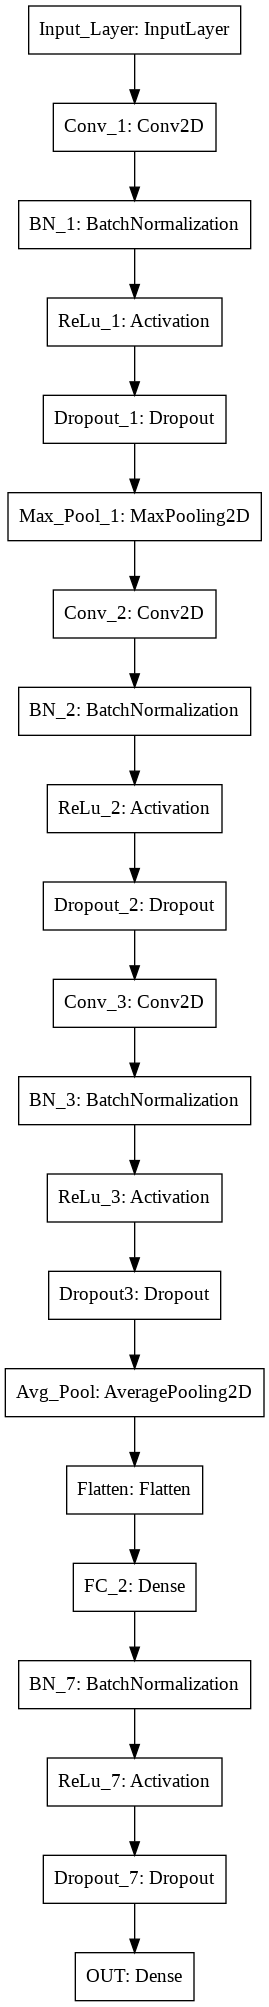

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

# TRAINING CNN

In [0]:
!unzip 'drive/My Drive/Colab Notebooks/TRAINING_v2.zip'

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    #shear_range=0.01,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    'TRAIN',
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=128,
    class_mode="binary",
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    'VAL',
    target_size=(256, 256),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 60,
    shuffle = False
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Found 2407 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=19,
        epochs=100,
        validation_data=val_generator,
        validation_steps=2
        )

model.save("drive/My Drive/Colab Notebooks/CNN_v4_beta.h5")
print("Saved model to disk")

loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc_train = history.history['acc']
acc_val = history.history['val_acc']
df_hist = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'acc_train':acc_train, 'acc_val':acc_val})
df_hist.to_csv('drive/My Drive/Colab Notebooks/CNN_v4_history.csv')

Epoch 1/100
19/19 [==============================] - 44s 2s/step - loss: 0.6965 - acc: 0.6415 - val_loss: 0.5727 - val_acc: 0.7167
Epoch 2/100
19/19 [==============================] - 40s 2s/step - loss: 0.5041 - acc: 0.7634 - val_loss: 0.5064 - val_acc: 0.7583
Epoch 3/100
19/19 [==============================] - 41s 2s/step - loss: 0.4269 - acc: 0.8130 - val_loss: 0.5887 - val_acc: 0.7500
Epoch 4/100
19/19 [==============================] - 40s 2s/step - loss: 0.3816 - acc: 0.8331 - val_loss: 0.5458 - val_acc: 0.7583
Epoch 5/100
19/19 [==============================] - 41s 2s/step - loss: 0.3518 - acc: 0.8534 - val_loss: 0.5962 - val_acc: 0.7333
Epoch 6/100
19/19 [==============================] - 40s 2s/step - loss: 0.3357 - acc: 0.8616 - val_loss: 2.0297 - val_acc: 0.5167
Epoch 7/100
19/19 [==============================] - 40s 2s/step - loss: 0.3066 - acc: 0.8703 - val_loss: 0.5378 - val_acc: 0.7500
Epoch 8/100
19/19 [==============================] - 40s 2s/step - loss: 0.2902 - a

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

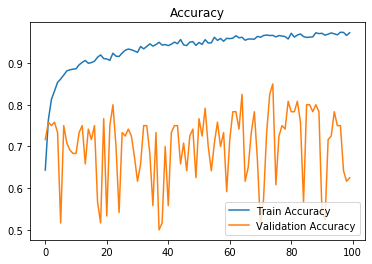

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('accuracy')

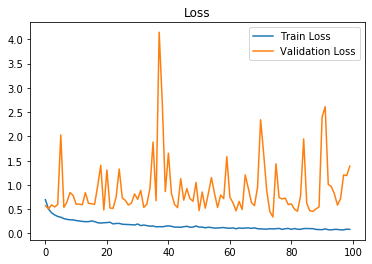

In [0]:
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.savefig('loss.png')
plt.show()


In [0]:
model.save("CNN_v4_beta.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
model.history

# TEST

VAL FALSE : 36/60

VAL TRUE : 59/60

TRAIN FALSE : 812/1106

TRAIN TRUE : 1300/1301

In [0]:
import re
i = 0
j = 0
dirr = 'TRAIN/FALSE/'

Gambar = []
Probability = []
Label = []

for path in os.listdir(dirr):
  img = load_img(dirr + path)  # this is a PIL image
  x = img_to_array(img)/255  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
  prob = model.predict(x)
  pred = 0
  if prob >= 0.5:
    pred = 1

  Gambar.append(int(''.join(filter(str.isdigit, path))))
  Probability.append(float(prob))
  Label.append(pred)

  if pred == 0:
    j += 1
  
  i += 1

df = pd.DataFrame({'Gambar':Gambar, 'Probability':Probability, 'Label': Label})

print(i)
print(j)

1106
812


In [0]:
df.sort_values(by=['Gambar'], ascending=True)